# Lets start playing with randomness
### Genetic Drift is a name for the effects of random sampling on the frequency of alleles in replicating organisms. 
Because populations are finite, sampling effects occur from generation to generation *even in the absence of selection*, and will cause mutations to sweep through a population over time. 

We'll use the random library to generate random numbers and sample from a list.

In [1]:
import random

You can view the **random** library reference here: https://docs.python.org/3/library/random.html

My general philosophy on coding is that it is never a bad idea to google something!

In [2]:
#We'll start just considering two possible genotypes, a 0 and a 1
genotypes = [0,1]

#Lets also use a variable for population size so we can easily 
#manipulate this value later without having to change 
#magic numbers around all over the place
pop_size = 10

We'll use the **choices** function from the [random library](https://docs.python.org/3/library/random.html#random.choices) to sample (with replacement) from a collection. In this case, we're sampling from the possible genotypes to fill up a population of *pop_size* individuals. 

_Important! This is a feature of the python3 random library. If you're using python2 we'll have to get a python3 instance running now._

In [3]:
population = random.choices(genotypes, k=pop_size)
print(population)

[1, 0, 0, 1, 1, 0, 0, 1, 1, 0]


In [4]:
#List comprehension
fitness = [(ind*0.1)+0.1 for ind in population]

### Now that we have a population, and know how to sample from a collection, we can simulate a generation by filling up the next generation with a random sampling of the original population.

In [5]:
next_generation = random.choices(population, k=pop_size)
print(next_generation)

[0, 1, 1, 0, 1, 0, 1, 0, 1, 1]


Let's do that one more time...

In [6]:
even_next_generation = random.choices(next_generation, k=pop_size)
even_next_generation

[1, 1, 0, 1, 1, 1, 0, 0, 1, 1]

#### Let's write a little function that returns the frequency of 1s in a population

In [7]:
def freq_ones(population):
    count = 0
    for individual in population:
        if individual == 1:
            count += 1
    
    return count/len(population)

#Of course we could do this more "pythonicly"
#by taking advantage of our genotype choices!
#(i.e., 0s and 1s -- so the sum is equal to the # of 1s)
def freq_ones(population):
    return(sum(population)/len(population))

In [8]:
print(freq_ones(population), 
      freq_ones(next_generation), 
      freq_ones(even_next_generation))

0.5 0.6 0.7


## Now let's plot a simple figure showing the frequency of 1s over these couple of generations

#### We'll use the **matplotlib** library, which mimics the way Matlab (hence the name) plots figures. 

For a brief tutorial on plotting with matplotlib see this link: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

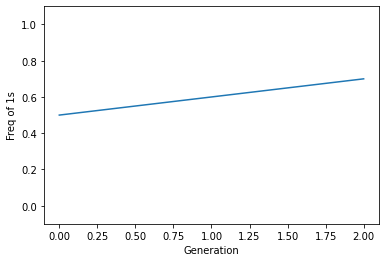

In [9]:
from matplotlib import pyplot
pyplot.plot([freq_ones(population), 
             freq_ones(next_generation), 
             freq_ones(even_next_generation)])
pyplot.ylim(-0.1, 1.1)
pyplot.xlabel("Generation")
pyplot.ylabel("Freq of 1s")
pyplot.show()

### We can start with a perfect 50/50 mix of genotypes by being explicit about the initial population.

#### We can also plot multiple lines in the same figure by calling plot() multiple times before calling show()!

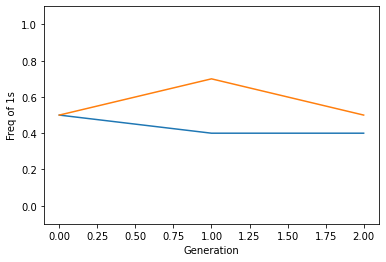

In [10]:
population = [0]*int(pop_size/2) + [1]*int(pop_size/2)
next_generation = random.choices(population, k=pop_size)
even_next_generation = random.choices(next_generation, k=pop_size)

#We could build up a list by appending to an 
#empty list...
first_sim_freqs = []
first_sim_freqs.append(freq_ones(population))
first_sim_freqs.append(freq_ones(next_generation))
first_sim_freqs.append(freq_ones(even_next_generation))

#plot the first simulation
pyplot.plot(first_sim_freqs)


#Now simulate another few generations....
population = [0]*int(pop_size/2) + [1]*int(pop_size/2)
next_generation = random.choices(population, k=pop_size)
even_next_generation = random.choices(next_generation, k=pop_size)

#and plot them, this time making the list all at once...
pyplot.plot([freq_ones(population), 
             freq_ones(next_generation), 
             freq_ones(even_next_generation)])


pyplot.ylim(-0.1, 1.1)
pyplot.xlabel("Generation")
pyplot.ylabel("Freq of 1s")
pyplot.show()

## 1. Now in your groups, simulate many (100) generations, and many replicates and plot the dynamics like we did above

Obviously you're not going to want to keep creating variables for each new population... So, you'll want to loop through generations, keeping track of the frequency of ones over time.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
num_generations = 100
pop_size = 100
population = [0]*int(pop_size*3/5) + [1]*int(pop_size*2/5)
freq1_array = [2/5]
for gen in range(num_generations):
    new_pop = random.choices(population, k=pop_size)
    freq1_array.append(np.mean(new_pop))
    population = new_pop

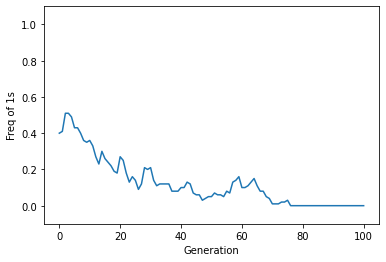

In [30]:
pyplot.plot(freq1_array)
pyplot.ylim(-0.1, 1.1)
pyplot.xlabel("Generation")
pyplot.ylabel("Freq of 1s")
pyplot.show()

## 2. Now plot many replicates on the same plot!
Insert a **Markdown** cell and describe what you notice about the populations.

In [32]:
num_generations = 100
pop_size=100
num_replicates = 100
results = [[3/5] for _ in range(num_replicates)]
for rep in range(num_replicates):
    population = [0]* int(pop_size*3/5) + [1]*int(pop_size*2/5)
    for gen in range(num_generations):
        new_pop = random.choices(population, k=pop_size)
        results[rep].append(np.mean(new_pop))
        population = new_pop

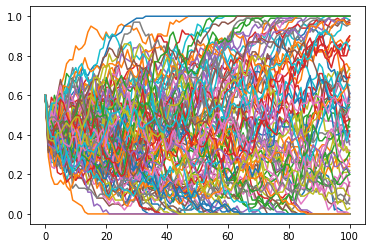

In [37]:
plt.plot(np.transpose(results))
plt.show()

## 3. If you're breezing through these questions, try visualizing the distribution of generation time until populations *fix* a genotype (when the population is all 0s or all 1s). 

Then, play with the population size to see how the distribution changes! 

Insert a **Markdown** cell and describe what you notice about how the distribution changes.

In [44]:
def find_fix(array):
    one_pos = np.where(np.array(array) == 1)[0]
    zero_pos = np.where(np.array(array) == 0)[0]
    if one_pos.size != 0:
        return one_pos[0]
    elif zero_pos.size !=0:
        return zero_pos[0]
    else:
        return len(array)

In [45]:
endpoints = [find_fix(array) for array in results]

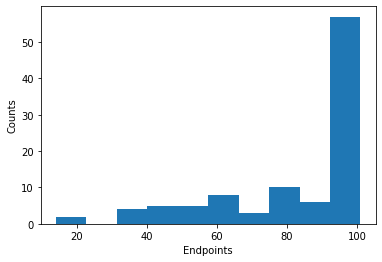

In [49]:
plt.hist(endpoints)
pyplot.xlabel("Endpoints")
pyplot.ylabel("Counts")
plt.show()

## 4. WHOA! You're really flying through this... 
### If you're here, try figuring out a way to add a fitness value to the "1" genotype that increases their likelihood of being sampled into the next generation (hint: look at the documentation for random.choices). 

See how starting with just one or a few of "1" genotypes affects their chances at fixing in the population. How does the value for fitness change the probability of fixation?

In [54]:
num_generations = 100
pop_size=100
num_replicates = 100
fitness = np.array([1, 1.2])
results = [[2/5] for _ in range(num_replicates)]
for rep in range(num_replicates):
    population = [0]* int(pop_size*2/5) + [1]*int(pop_size*3/5)
    for gen in range(num_generations):
        new_pop = random.choices(population, weights=fitness[population], k=pop_size)
        results[rep].append(np.mean(new_pop))
        population = new_pop

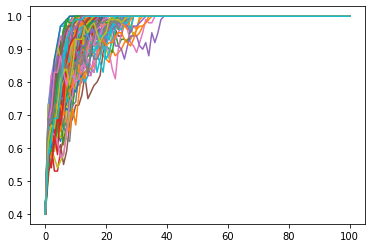

In [55]:
plt.plot(np.transpose(results))
plt.show()

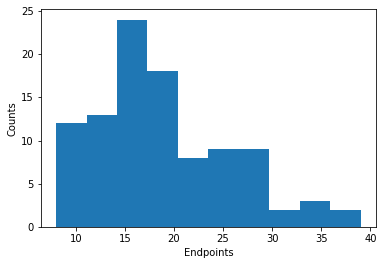

In [56]:
endpoints = [find_fix(array) for array in results]
plt.hist(endpoints)
pyplot.xlabel("Endpoints")
pyplot.ylabel("Counts")
plt.show()

## 5. Now you're just showing off. If you got all that done, see if you can add mutations between genotypes 
#### ( $0 \rightarrow 1$ and $1 \rightarrow 0$ ) With some small probability, for example. 

How does mutation change the dynamics of fixation?

In [57]:
def mutation_function(org, mut_prob):
    new_org = org
    #We mutate! 
    if np.random.rand() < mut_prob:
        if(org == 0):
            new_org = 1
        else:
            new_org = 0
    return new_org

In [64]:
num_generations = 100
pop_size=100
num_replicates = 100
fitness = np.array([1, 1.2])
mutation_prob = 0.01
results = [[2/5] for _ in range(num_replicates)]
for rep in range(num_replicates):
    population = [0]* int(pop_size*2/5) + [1]*int(pop_size*3/5)
    for gen in range(num_generations):
        new_pop = random.choices(population, weights=fitness[population], k=pop_size)
        new_pop_mutate = [mutation_function(org, mutation_prob) for org in new_pop]
        results[rep].append(np.mean(new_pop_mutate))
        population = new_pop_mutate

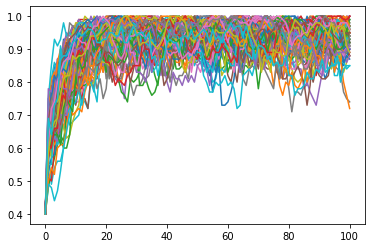

In [65]:
plt.plot(np.transpose(results))
plt.show()

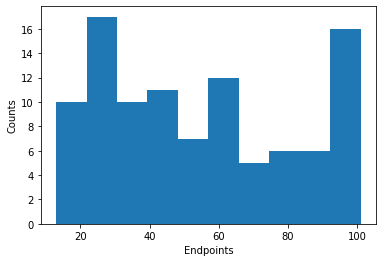

In [66]:
endpoints = [find_fix(array) for array in results]
plt.hist(endpoints)
pyplot.xlabel("Endpoints")
pyplot.ylabel("Counts")
plt.show()